## Calculate Useful Measures

In [1]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn_stocks = sqlite3.connect("stocks.db")

In [3]:
## The assumption is we only take data from last 3 months
bottom_date = datetime.today() - timedelta(90)

## Converting to desired format
bottom_date = bottom_date.strftime(format = "%Y-%m-%d 00:00:00")
bottom_date = "'" + bottom_date + "'"

In [4]:
bottom_date

"'2020-07-15 00:00:00'"

In [5]:
## Loading data
## We need to exclude cases where adjusted = '-'
df = pd.read_sql_query("SELECT ticker, date, adjusted FROM stocks WHERE date >= {}".format(bottom_date), conn_stocks)

In [6]:
## Sorting values to have correct stocks for specific ticker grouped in one cluster
df = df.sort_values(["ticker", 'date'])

In [7]:
## Calculating measures for each ticker separately

## Pct change
df['pct_change'] = df.groupby('ticker')['adjusted'].apply(lambda x: x.pct_change(1))

## Moving averages
df['ma8'] = df.groupby('ticker')['adjusted'].apply(lambda x: x.rolling(8).mean())
df['ma21'] = df.groupby('ticker')['adjusted'].apply(lambda x: x.rolling(21).mean())

## Change in moving averages
df['ma8_pct_change'] = df.groupby('ticker')['ma8'].apply(lambda x: x.pct_change(1))
df['ma21_pct_change'] = df.groupby('ticker')['ma21'].apply(lambda x: x.pct_change(1))


In [38]:
df

,ticker,date,adjusted,pct_change,ma8,ma21,ma8_pct_change,ma21_pct_change
0,A,2020-07-14 00:00:00,90.526779,NaN,NaN,NaN,NaN,NaN
1,A,2020-07-15 00:00:00,92.712830,0.024148,NaN,NaN,NaN,NaN
2,A,2020-07-16 00:00:00,92.692871,-0.000215,NaN,NaN,NaN,NaN
3,A,2020-07-17 00:00:00,94.200157,0.016261,NaN,NaN,NaN,NaN
4,A,2020-07-20 00:00:00,95.038635,0.008901,NaN,NaN,NaN,NaN
5,A,2020-07-21 00:00:00,95.847176,0.008507,NaN,NaN,NaN,NaN
6,A,2020-07-22 00:00:00,96.176582,0.003437,NaN,NaN,NaN,NaN
7,A,2020-07-23 00:00:00,96.486031,0.003218,94.210133,NaN,NaN,NaN
8,A,2020-07-24 00:00:00,94.639359,-0.019139,94.724205,NaN,0.005457,NaN
9,A,2020-07-27 00:00:00,97.094925,0.025947,95.271967,NaN,0.005783,NaN


In [39]:
df.dropna(inplace = True)

## BUY/SELL based on ma8 & ma21 changes

In [40]:
## Buy when both ma8 and ma21 change their trend to positive, start rising
buy = df.groupby('ticker').apply(lambda x: np.where(
    (x['ma8_pct_change'] > 0) & (x['ma8_pct_change'].shift(1) < 0) & (x['ma21_pct_change'] > 0) & (x['ma21_pct_change'].shift(1) < 0), 
    "YES", 
    "NO"))

buy = buy.to_list()
buy = [x for y in buy for x in y]

df['buy'] = buy

## Sell when both ma8 and ma21 change their trend to negative, start plummeting
sell = df.groupby('ticker').apply(lambda x: np.where(
    (x['ma8_pct_change'] < 0) & (x['ma8_pct_change'].shift(1) > 0) & (x['ma21_pct_change'] < 0) & (x['ma21_pct_change'].shift(1) > 0), 
    "YES", 
    "NO"))

sell = sell.to_list()
sell = [x for y in sell for x in y]

df['sell'] = sell

In [45]:
df['date'].max()

'2020-10-09 00:00:00'

In [46]:
df.loc[(df['buy'] == 'YES') & (df['date'] == df['date'].max())].sort_values(by = 'date').tail(10)

,ticker,date,adjusted,pct_change,ma8,ma21,ma8_pct_change,ma21_pct_change,buy,sell
45246,ABMD,2020-10-09 00:00:00,273.559998,0.008702,268.538754,269.449524,0.000512,0.000272,YES,NO
5442,BHP,2020-10-09 00:00:00,52.869999,0.006664,51.813749,52.955238,0.003073,0.000207,YES,NO
50850,CTXS,2020-10-09 00:00:00,139.429993,0.028928,136.152498,135.513809,0.002282,0.001601,YES,NO
51606,EBAY,2020-10-09 00:00:00,55.450001,0.064708,52.007500,51.584286,0.006775,0.002898,YES,NO
15454,FIS,2020-10-09 00:00:00,149.029999,0.016576,146.175001,146.345238,0.000197,0.001033,YES,NO
23014,KSU,2020-10-09 00:00:00,186.639999,0.014017,182.006250,183.179523,0.002665,0.000486,YES,NO
56596,LBTYA,2020-10-09 00:00:00,22.070000,0.061058,20.876250,21.174286,0.004088,0.000630,YES,NO
56659,LBTYK,2020-10-09 00:00:00,21.620001,0.058248,20.440000,20.744286,0.004423,0.000390,YES,NO
57604,MDLZ,2020-10-09 00:00:00,57.299999,0.014159,56.922500,56.605209,0.001804,0.000434,YES,NO
63526,SGMO,2020-10-09 00:00:00,10.830000,0.095045,9.802500,10.119048,0.012132,0.003116,YES,NO


In [43]:
df.loc[df['ticker'] == 'SGMO']

,ticker,date,adjusted,pct_change,ma8,ma21,ma8_pct_change,ma21_pct_change,buy,sell
63485,SGMO,2020-08-12 00:00:00,11.68,-0.037891,11.85375,11.287619,0.009044,0.004449,NO,NO
63486,SGMO,2020-08-13 00:00:00,11.62,-0.005137,11.86375,11.306667,0.000844,0.001687,NO,NO
63487,SGMO,2020-08-14 00:00:00,11.39,-0.019793,11.85750,11.314762,-0.000527,0.000716,NO,NO
63488,SGMO,2020-08-17 00:00:00,11.69,0.026339,11.88125,11.338571,0.002003,0.002104,NO,NO
63489,SGMO,2020-08-18 00:00:00,11.90,0.017964,11.90375,11.363333,0.001894,0.002184,NO,NO
63490,SGMO,2020-08-19 00:00:00,12.22,0.026891,11.89000,11.418095,-0.001155,0.004819,NO,NO
63491,SGMO,2020-08-20 00:00:00,11.66,-0.045827,11.78750,11.443333,-0.008621,0.002210,NO,NO
63492,SGMO,2020-08-21 00:00:00,11.53,-0.011149,11.71125,11.466190,-0.006469,0.001997,NO,NO
63493,SGMO,2020-08-24 00:00:00,11.21,-0.027754,11.65250,11.488095,-0.005017,0.001910,NO,NO
63494,SGMO,2020-08-25 00:00:00,11.29,0.007136,11.61125,11.497143,-0.003540,0.000788,NO,NO


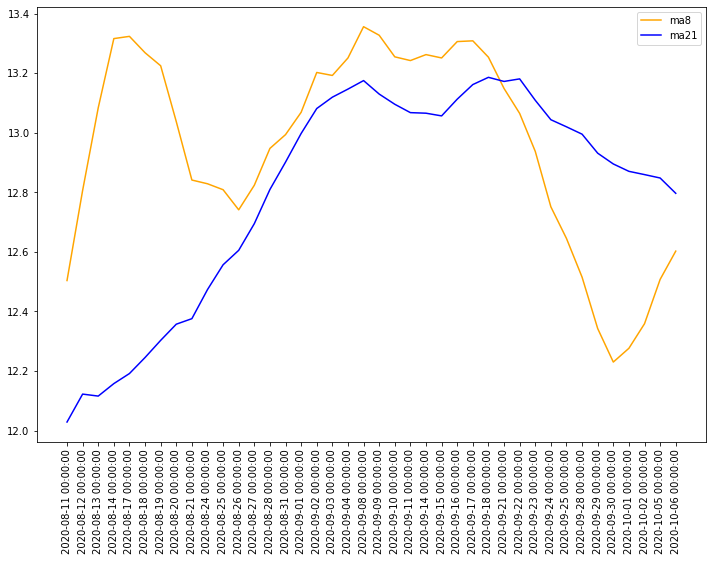

In [12]:
tst = df.loc[df['ticker'] == 'AAL']

fig, ax = plt.subplots(figsize = (12,8))

x = tst['date']
series1 = tst['ma8']
series2 = tst['ma21']

ax.plot(x, series1, color = 'orange', label = 'ma8')
ax.plot(x, series2, color = 'blue', label = 'ma21')
ax.set_xticklabels(labels = x, rotation = 90)
plt.legend();

## First price increase in a specificed period

In [13]:
def first_price_increase(df, ticker, ndays):

    ## Getting data subset for the specific ticker
    df_ticker = df.loc[df['ticker'] == ticker].copy()


    ## Creating list of dates available for ticker

    dates = list(df_ticker['date'].sort_values(ascending = False).unique())

    ## Getting latest change in price for the ticker.List of dates is sorted from the latest, then we get the first list element
    max_date = dates[0]


    price_change = df_ticker.loc[df_ticker['date'] == str(max_date), 'pct_change']
    price_change = price_change.values[0]

    ## If price change is positive we start backwards itteration, otherwise we drop a case and carry on with the next ticker
    ## Number of days we want to check backwards - ndays

    if price_change > 0:
        
        trend_change = True
        
        for nday in range(1, ndays + 1):   
            
            prev_date = dates[nday]
            price_change_nday = df_ticker.loc[df_ticker['date'] == prev_date, 'pct_change']
            price_change_nday = price_change_nday.values[0]

            if price_change_nday > 0:
                trend_change = False
                break
                
            
        if trend_change is True:
            return ticker
        else:
            return None
        
    else:
        return None

In [14]:
tickers_trend_change = []
for ticker in df['ticker'].unique():
    ticker = first_price_increase(df, ticker, 4)
    
    if ticker is not None:
        tickers_trend_change.append(ticker)

In [36]:
## Lowest price in period

def lowest_price_in_ndays(df, ndays):

    tickers_with_lowest_price = []
    for ticker in df['ticker'].unique():
        
        df_ticker = df.loc[df['ticker'] == ticker].copy()
        dates = list(df_ticker['date'].sort_values(ascending = False).unique())


        ## Getting latest change in price for the ticker.List of dates is sorted from the latest, then we get the first list element
        max_date = dates[0]

        price_change = df_ticker.loc[df_ticker['date'] == str(max_date), 'pct_change']
        price_change = price_change.values[0]
        
        trend_change = True
        
        if price_change < 0: 

            trend_change = False

            for nday in range(1, ndays + 1):   

                prev_date = dates[nday]
                price_change_nday = df_ticker.loc[df_ticker['date'] == prev_date, 'pct_change']
                price_change_nday = price_change_nday.values[0]

                if price_change_nday > 0:
                    trend_change = True

                    break


        if trend_change == False:
            tickers_with_lowest_price.append(ticker)

        else:
            continue
            
    
    df_to_return = df.loc[(df['ticker'].isin(tickers_with_lowest_price)) & (df['date'].isin(dates[0:ndays + 1]))].sort_values(by = ['ticker', 'date'])
    return df_to_return


In [37]:
tickers = lowest_price_in_ndays(df, 4)

In [38]:
tickers

,ticker,date,adjusted,pct_change,ma8,ma21,ma8_pct_change,ma21_pct_change
3100,ARCH,2020-10-06 00:00:00,44.259998,-0.042613,44.578750,45.032857,-0.003827,0.003864
3101,ARCH,2020-10-07 00:00:00,42.000000,-0.051062,44.011250,45.166667,-0.012730,0.002971
3102,ARCH,2020-10-08 00:00:00,41.889999,-0.002619,43.416250,45.263810,-0.013519,0.002151
3103,ARCH,2020-10-09 00:00:00,40.270000,-0.038673,43.060000,45.303334,-0.008205,0.000873
3104,ARCH,2020-10-12 00:00:00,39.320000,-0.023591,42.665000,45.236667,-0.009173,-0.001472
29328,OAS,2020-10-06 00:00:00,0.170000,-0.055556,0.280000,0.385714,-0.089431,-0.042553
29329,OAS,2020-10-07 00:00:00,0.170000,0.000000,0.250000,0.370000,-0.107143,-0.040741
29330,OAS,2020-10-08 00:00:00,0.170000,0.000000,0.220000,0.356190,-0.120000,-0.037323
29331,OAS,2020-10-09 00:00:00,0.160000,-0.058824,0.188750,0.344286,-0.142045,-0.033422
29332,OAS,2020-10-12 00:00:00,0.100000,-0.375000,0.166250,0.330952,-0.119205,-0.038728
